# Advizeo Electricity Consumption Analysis & Forecasting

---

### Project Participant¶

* CAI Yutong
* EFREI Paris
* E-mail: yutong.cai@efrei.net

### Reference Material

* Understand the LSTM Network: https://www.jianshu.com/p/9dc9f41f0b29
* Time Series Prediction with LSTM: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

---

## PART 1. Import & Check Dataset

### 1.1. Import Dataset

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('sample_data.csv', index_col=0, parse_dates=[0])

### 1.2. Check Dataset Information

#### 1.2.1. Check Dataset Shape

In [3]:
dataset.shape

(38016, 10)

#### 1.2.2. Check Dataset Content

In [4]:
dataset.head(10)

,Bat1,Bat2,Bat3,Bat4,Bat5,Bat6,Bat7,Bat8,Bat9,Bat10
2017-04-01 00:00:00,387.0,542.0,484.0,443.0,367.0,681.0,632.0,508.0,277.0,468.0
2017-04-01 00:10:00,384.0,544.0,518.0,459.0,362.0,717.0,652.0,518.0,330.0,481.0
2017-04-01 00:20:00,373.0,540.0,532.0,467.0,361.0,732.0,639.0,504.0,334.0,472.0
2017-04-01 00:30:00,347.0,542.0,521.0,448.0,358.0,723.0,619.0,427.0,329.0,451.0
2017-04-01 00:40:00,342.0,549.0,504.0,455.0,372.0,661.0,639.0,408.0,326.0,406.0
2017-04-01 00:50:00,350.0,563.0,535.0,452.0,392.0,685.0,630.0,405.0,317.0,414.0
2017-04-01 01:00:00,353.0,547.0,536.0,454.0,397.0,717.0,672.0,409.0,313.0,389.0
2017-04-01 01:10:00,337.0,551.0,513.0,428.0,365.0,731.0,672.0,407.0,294.0,417.0
2017-04-01 01:20:00,341.0,550.0,476.0,433.0,387.0,642.0,671.0,403.0,293.0,400.0
2017-04-01 01:30:00,349.0,566.0,551.0,426.0,378.0,699.0,663.0,405.0,299.0,393.0


#### 1.2.3. Check Time Serise Range

In [5]:
print('First Timestamp: ', dataset.index[0])
print('Last  Timestamp: ', dataset.index[-1])

First Timestamp:  2017-04-01 00:00:00
Last  Timestamp:  2017-12-20 23:50:00


#### 1.2.4. Check Variable Range

In [6]:
dataset.describe()

,Bat1,Bat2,Bat3,Bat4,Bat5,Bat6,Bat7,Bat8,Bat9,Bat10
count,38010.000000,38015.000000,38014.000000,38012.000000,38008.000000,37989.000000,37983.000000,37999.000000,38009.000000,38016.000000
mean,588.433018,1020.200329,672.935155,405.216931,758.104083,1046.237687,871.768028,658.024211,495.471007,651.512837
std,161.397015,316.291439,159.199568,114.503711,267.416365,284.335270,245.212724,167.722072,159.519846,173.064313
min,4.000000,3.000000,6.000000,1.000000,3.000000,3.000000,3.000000,54.000000,1.000000,1.000000
25%,465.000000,732.000000,557.000000,310.000000,464.000000,813.000000,649.000000,529.000000,372.000000,518.000000
50%,616.000000,1059.000000,687.000000,424.000000,848.000000,1085.000000,901.000000,672.000000,502.000000,683.000000
75%,713.000000,1298.000000,787.000000,501.000000,985.000000,1237.000000,1058.000000,781.000000,594.000000,781.000000
max,1037.000000,1779.000000,1137.000000,678.000000,1339.000000,2007.000000,1570.000000,1239.000000,1004.000000,1124.000000


#### 1.2.5. Check Missing Value

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38016 entries, 2017-04-01 00:00:00 to 2017-12-20 23:50:00
Data columns (total 10 columns):
Bat1     38010 non-null float64
Bat2     38015 non-null float64
Bat3     38014 non-null float64
Bat4     38012 non-null float64
Bat5     38008 non-null float64
Bat6     37989 non-null float64
Bat7     37983 non-null float64
Bat8     37999 non-null float64
Bat9     38009 non-null float64
Bat10    38016 non-null float64
dtypes: float64(10)
memory usage: 3.2 MB


---

## PART 2. Feature Selection & Data Resampling

### 2.1. Selection & Resample the Feature

In [8]:
data = dataset['Bat1'].resample('B').mean()

### 2.2. Check Dataset Content

In [9]:
data.head(10)

2017-03-31    484.472222
2017-04-03    588.055556
2017-04-04    583.986111
2017-04-05    562.916667
2017-04-06    546.979167
2017-04-07    483.717593
2017-04-10    573.590278
2017-04-11    563.381944
2017-04-12    558.493056
2017-04-13    561.541667
Freq: B, Name: Bat1, dtype: float64

### 2.3. Check Missing Value

In [10]:
sum(data.isnull())

0

---

## PART 3. Split & Show Dataset

### 3.1. Split Dataset to Training & Testing Set

In [11]:
data_train = data['2017-04':'2017-09']
data_test = data['2017-10':]

# 选择2017年4月到9月的用电数据作为训练集
# 选择2017年10月及之后的用电数据作为测试集

In [12]:
print('First Timestamp: ', data_train.index[0])
print('Last  Timestamp: ', data_train.index[-1])

First Timestamp:  2017-04-03 00:00:00
Last  Timestamp:  2017-09-29 00:00:00


In [13]:
print('First Timestamp: ', data_test.index[0])
print('Last  Timestamp: ', data_test.index[-1])

First Timestamp:  2017-10-02 00:00:00
Last  Timestamp:  2017-12-20 00:00:00


### 3.2. Draw Training Data & Testing Data Trends¶

In [14]:
import matplotlib.pyplot as plt

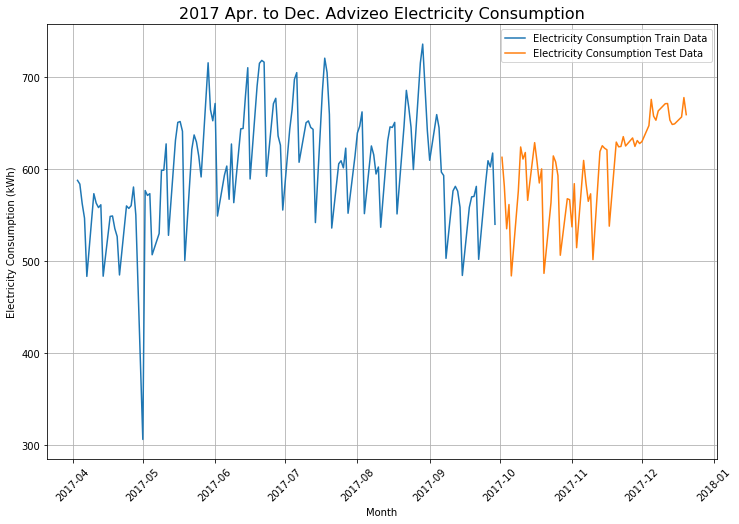

In [15]:
plt.figure(figsize=(12,8))

plt.plot(data_train)
plt.plot(data_test)

plt.title('2017 Apr. to Dec. Advizeo Electricity Consumption', size=16)
plt.xlabel('Month')
plt.ylabel('Electricity Consumption (kWh)') 

plt.xticks(rotation=45)

plt.legend(['Electricity Consumption Train Data','Electricity Consumption Test Data'])

plt.grid(True)
plt.show()

---

## PART 4. Advizeo Electricity Consumption Forecast with ARIMA

### 2.1. Make First Order Difference or Second Order Difference

#### 2.1.1. Make First Order Difference

In [16]:
data_train_diff = data_train.diff()
data_train_diff = data_train_diff.dropna()

# 做一阶差分，让数据变化趋势变得平稳

#### 2.2.2. Plot the Training Data After the First Order Difference

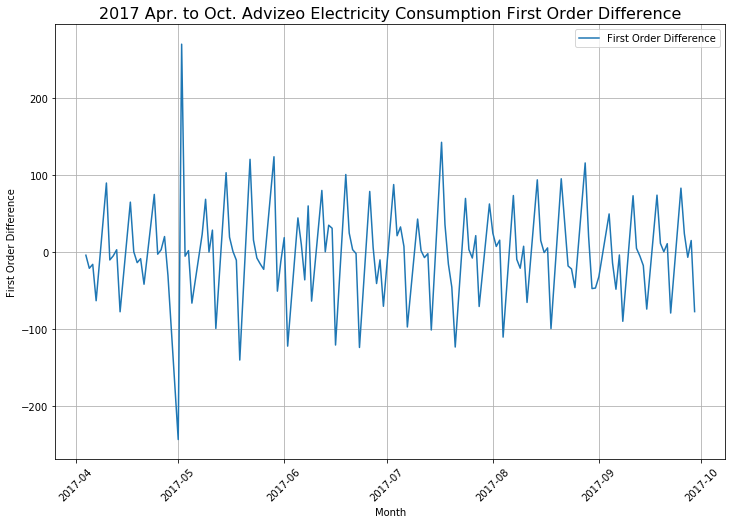

In [17]:
plt.figure(figsize=(12,8))
plt.plot(data_train_diff)

plt.title('2017 Apr. to Oct. Advizeo Electricity Consumption First Order Difference', size=16)
plt.xlabel('Month')
plt.ylabel('First Order Difference')

plt.xticks(rotation=45)

plt.legend(['First Order Difference'])

plt.grid(True)
plt.show()

# 根据观察一阶差分基本满足分析需求，不需再次进行二阶差分

### 2.2. Draw ACF&PACF Chart and Select Hyperparameter q&p

#### 2.2.1. Draw ACF Chart and Chose Hyperparameter q in MA Model

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

Text(0.5, 1.0, '2017 Apr. to Oct. Advizeo Electricity Consumption ACF')

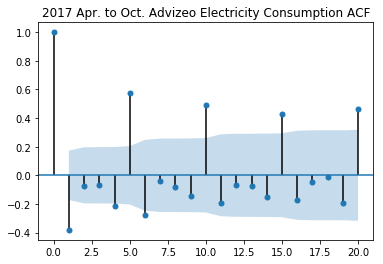

In [19]:
acf = plot_acf(data_train_diff, lags=20)

plt.title("2017 Apr. to Oct. Advizeo Electricity Consumption ACF")

#### 2.2.2. Draw PACF Chart and Chose Hyperparameter p in AR Model

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf

Text(0.5, 1.0, '2017 Apr. to Oct. Advizeo Electricity Consumption PACF')

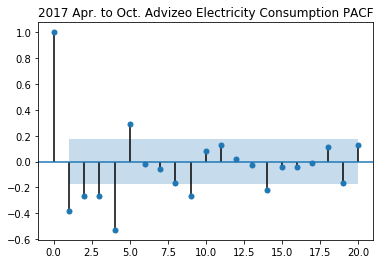

In [21]:
pacf = plot_pacf(data_train_diff, lags=20)

plt.title("2017 Apr. to Oct. Advizeo Electricity Consumption PACF")

### 2.3. Training ARIMA Model

In [22]:
from statsmodels.tsa.arima_model import ARIMA

In [23]:
# model = ARIMA(data_train, order=(1, 1, 1),freq='B')
model = ARIMA(data_train, order=(6, 1, 2),freq='B')
result = model.fit()
print(result.summary())

# order=(p,d,q)

                             ARIMA Model Results                              
Dep. Variable:                 D.Bat1   No. Observations:                  129
Model:                 ARIMA(6, 1, 2)   Log Likelihood                -672.199
Method:                       css-mle   S.D. of innovations             43.825
Date:                Tue, 15 Jan 2019   AIC                           1364.397
Time:                        22:58:53   BIC                           1392.995
Sample:                    04-04-2017   HQIC                          1376.017
                         - 09-29-2017                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2353      1.510      0.156      0.876      -2.724       3.194
ar.L1.D.Bat1     0.2931      0.167      1.757      0.082      -0.034       0.620
ar.L2.D.Bat1    -0.5943      0.138     -4.31

### 2.4. Use ARIMA Model to Predict Advizeo Electricity Consumption After 2017  Oct. (Long-term Forecast)

#### 2.4.1. Use ARIMA Model to Predict

In [24]:
start_date = str(data_test.index[0])[0:10]
end_date = str(data_test.index[-1])[0:10]

print('Testing Data Start Date: ' + start_date)
print('Testing Data  End  Date: ' + end_date)

Testing Data Start Date: 2017-10-02
Testing Data  End  Date: 2017-12-20


In [25]:
predict_long = result.predict(start_date, end_date, dynamic=True, typ='levels')
# print(predict)

#### 2.4.2. Model evaluation

In [26]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error

In [27]:
y_hat = np.array(predict_long)
y_real = np.array(data_test)

rmse = sqrt(mean_squared_error(y_real, y_hat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 43.121


#### 2.4.3. Draw the Predict Result

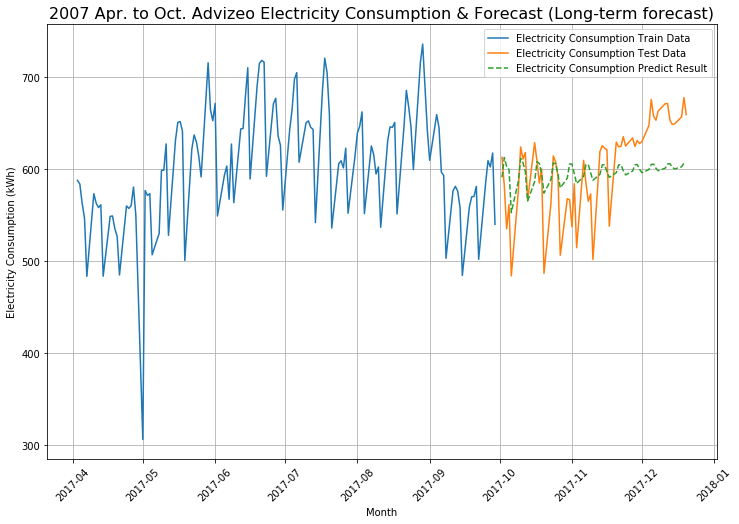

In [28]:
plt.figure(figsize=(12, 8))

plt.plot(data_train)
plt.plot(data_test)
plt.plot(predict_long,'--')

plt.title('2007 Apr. to Oct. Advizeo Electricity Consumption & Forecast (Long-term forecast)', size=16)
plt.xlabel('Month')
plt.ylabel('Electricity Consumption (kWh)')  

plt.xticks(rotation=45)

plt.legend(['Electricity Consumption Train Data', 'Electricity Consumption Test Data', 'Electricity Consumption Predict Result'])

plt.grid(True)
plt.show()

### 2.5. Use ARIMA Model to Predict Advizeo Electricity Consumption After 2017  Oct. (N-Days Forecast)

In [29]:
start_date = str(data_test.index[0])[0:10]
end_date = str(data_test.index[-1])[0:10]

print('Testing Data Start Date: ' + start_date)
print('Testing Data  End  Date: ' + end_date)
print('Test set verifiable days: ' + str(len(data_test)))

Testing Data Start Date: 2017-10-02
Testing Data  End  Date: 2017-12-20
Test set verifiable days: 58


#### 2.5.1. Use ARIMA Model to Predict

In [30]:
def NDayForeast(n):
    start_date = str(data_test.index[0])[0:10]
    end_date = str(data_test.index[n-1])[0:10]
    
    predict = result.predict(start_date, end_date, dynamic=True, typ='levels')
    # print(predict)
    
    return predict

In [31]:
predict_ndays = NDayForeast(10)
predict_ndays

2017-10-02    591.375043
2017-10-03    612.889323
2017-10-04    603.140847
2017-10-05    600.252201
2017-10-06    552.974024
2017-10-09    587.090888
2017-10-10    611.889333
2017-10-11    607.284872
2017-10-12    597.532718
2017-10-13    565.586833
Freq: B, dtype: float64

#### 2.5.2. Model evaluation

In [32]:
def NDayEvaluate(predict):
    y_hat = np.array(predict)
    y_real = np.array(data_test[0:len(predict)])

    rmse = sqrt(mean_squared_error(y_real, y_hat))
    print('Test RMSE: %.3f' % rmse)

In [33]:
NDayEvaluate(predict_ndays)

Test RMSE: 35.985


#### 2.5.3. Draw the Predict Result

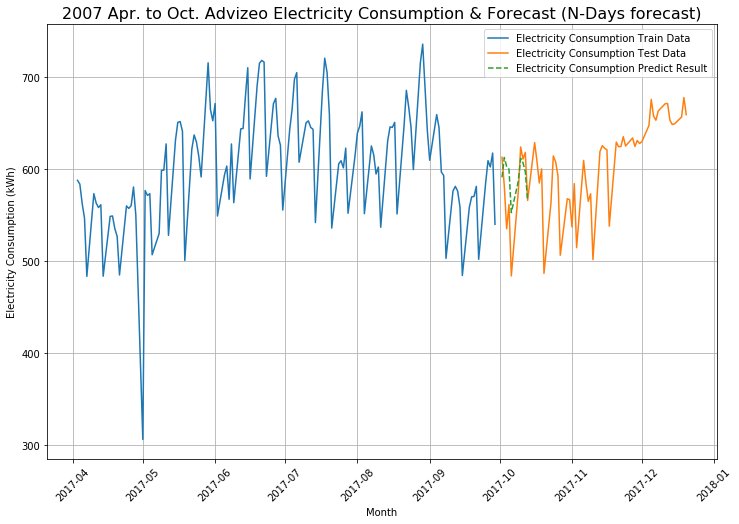

In [34]:
plt.figure(figsize=(12, 8))

plt.plot(data_train)
plt.plot(data_test)
plt.plot(predict_ndays,'--')



plt.title('2007 Apr. to Oct. Advizeo Electricity Consumption & Forecast (N-Days forecast)', size=16)
plt.xlabel('Month')
plt.ylabel('Electricity Consumption (kWh)')  

plt.xticks(rotation=45)

plt.legend(['Electricity Consumption Train Data', 'Electricity Consumption Test Data', 'Electricity Consumption Predict Result'])

plt.grid(True)
plt.show()

### 2.6. Use ARIMA Model to Predict Advizeo Electricity Consumption After 2017  Oct. (Daily Forecast)

#### 2.6.1. Use ARIMA Model to Predict

In [35]:
predict_list=pd.Series([])

for i in range(len(data_test)):
    model = ARIMA(data[0:i+len(data_train)+1], order=(6, 1, 2), freq='B')
    result = model.fit()
    y_predict = result.predict(str(data.index[i+len(data_train)+1])[0:10], dynamic=True, typ='levels')
    predict_list = predict_list.append(y_predict)

/Users/caiyutong/anaconda3/envs/tensorflow/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


#### 2.6.2. Model evaluation

In [36]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error

In [37]:
y_hat = np.array(predict_list)
y_real = np.array(data_test)

rmse = sqrt(mean_squared_error(y_real, y_hat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 30.431


#### 2.6.3. Draw the Predict Result

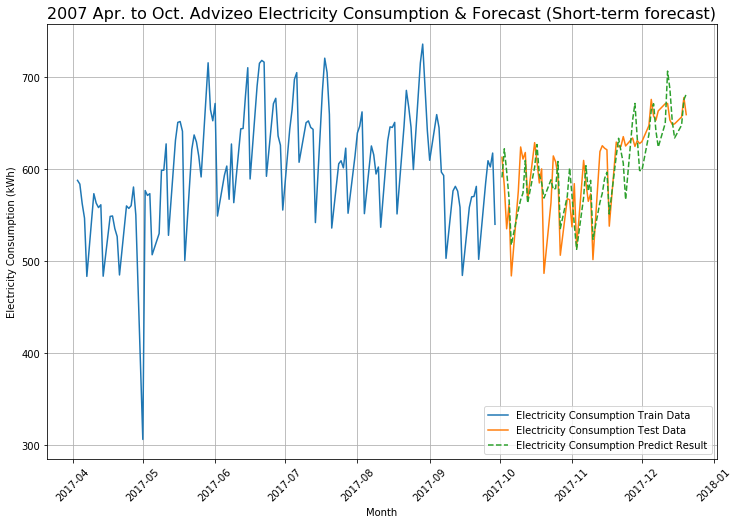

In [38]:
plt.figure(figsize=(12, 8))

plt.plot(data_train)
plt.plot(data_test)
plt.plot(predict_list,'--')



plt.title('2007 Apr. to Oct. Advizeo Electricity Consumption & Forecast (Short-term forecast)', size=16)
plt.xlabel('Month')
plt.ylabel('Electricity Consumption (kWh)')  

plt.xticks(rotation=45)

plt.legend(['Electricity Consumption Train Data', 'Electricity Consumption Test Data', 'Electricity Consumption Predict Result'])

plt.grid(True)
plt.show()

---

## PART 5. Advizeo Electricity Consumption Forecast with LSTM

### 5.1. Prepare Data

In [39]:
all_data = data.values.reshape(-1,1)
train_data = data_train.values.reshape(-1,1)
test_data = data_test.values.reshape(-1,1)

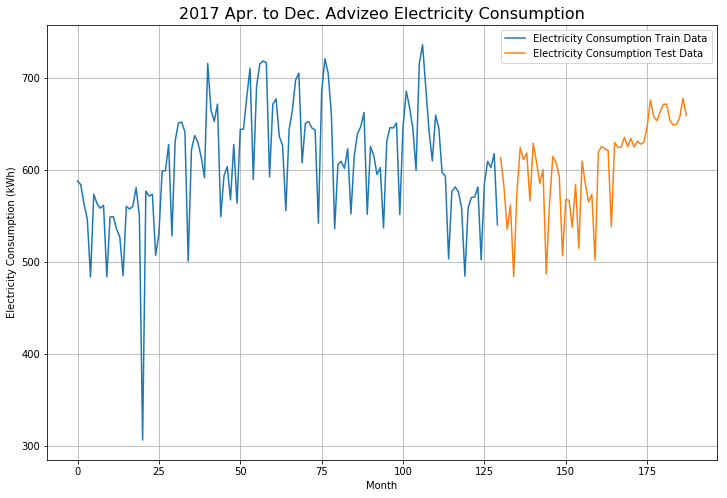

In [40]:
plt.figure(figsize=(12, 8))

trainDataPlot = np.empty_like(all_data)
trainDataPlot[:, :] = np.nan
trainDataPlot[0:len(train_data), :] = train_data

testDataPlot = np.empty_like(all_data)
testDataPlot[:, :] = np.nan
testDataPlot[len(train_data):len(all_data)-1, :] = test_data

#plt.plot(all_data,"-")
#plt.plot(trainDataPlot,"--")
#plt.plot(testDataPlot,"--")

plt.plot(trainDataPlot,"-")
plt.plot(testDataPlot,"-")


#plt.legend(['Stock Close All Data', 'Stock Close Train Data', 'Stock Close Test Data'])
plt.legend(['Electricity Consumption Train Data', 'Electricity Consumption Test Data'])

plt.title('2017 Apr. to Dec. Advizeo Electricity Consumption', size=16)
plt.xlabel('Month')
plt.ylabel('Electricity Consumption (kWh)')  

plt.grid(True)
plt.show()

### 5.2. Data Normalization

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
minMaxScaler = MinMaxScaler(feature_range=(0, 1))

train_data_scale = minMaxScaler.fit_transform(train_data)
test_data_scale = minMaxScaler.transform(test_data)

### 5.3. Create Training Samples and Targets

In [43]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [44]:
# Window size: look_back

look_back = 3
X_train, Y_train = create_dataset(train_data_scale, look_back)
X_test, Y_test = create_dataset(test_data_scale, look_back)

### 5.4. Transform Data into LSTM Input Format

In [45]:
# reshape input to be [samples, time steps, features]

X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

### 5.5. Create & Train LSTM Model

In [46]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

Using TensorFlow backend.


In [47]:
model = Sequential()

model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_lstm , Y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.3810
Epoch 2/100
 - 0s - loss: 0.1271
Epoch 3/100
 - 0s - loss: 0.0269
Epoch 4/100
 - 0s - loss: 0.0176
Epoch 5/100
 - 0s - loss: 0.0174
Epoch 6/100
 - 0s - loss: 0.0172
Epoch 7/100
 - 0s - loss: 0.0173
Epoch 8/100
 - 0s - loss: 0.0174
Epoch 9/100
 - 0s - loss: 0.0173
Epoch 10/100
 - 0s - loss: 0.0174
Epoch 11/100
 - 0s - loss: 0.0173
Epoch 12/100
 - 0s - loss: 0.0173
Epoch 13/100
 - 0s - loss: 0.0175
Epoch 14/100
 - 0s - loss: 0.0173
Epoch 15/100
 - 0s - loss: 0.0174
Epoch 16/100
 - 0s - loss: 0.0173
Epoch 17/100
 - 0s - loss: 0.0173
Epoch 18/100
 - 0s - loss: 0.0173
Epoch 19/100
 - 0s - loss: 0.0172
Epoch 20/100
 - 0s - loss: 0.0172
Epoch 21/100
 - 0s - loss: 0.0176
Epoch 22/100
 - 0s - loss: 0.0172
Epoch 23/100
 - 0s - loss: 0.0174
Epoch 24/100
 - 0s - loss: 0.0170
Epoch 25/100
 - 0s - loss: 0.0177
Epoch 26/100
 - 0s - loss: 0.0171
Epoch 27/100
 - 0s - loss: 0.0176
Epoch 28/100
 - 0s - loss: 0.0170
Epoch 29/100
 - 0s - loss: 0.0173
Epoch 30/100
 - 0s - lo

### 5.6. Model Evaluation

In [48]:
# make predictions

train_predict = model.predict(X_train_lstm)
test_predict = model.predict(X_test_lstm)

In [49]:
# invert predictions

train_predict = minMaxScaler.inverse_transform(train_predict)
train_real = minMaxScaler.inverse_transform([Y_train])

test_predict = minMaxScaler.inverse_transform(test_predict)
test_real = minMaxScaler.inverse_transform([Y_test])

In [50]:
import math
from sklearn.metrics import mean_squared_error

In [51]:
# calculate root mean squared error

train_score = math.sqrt(mean_squared_error(train_real[0], train_predict[:,0]))
print('Train RMSE Score: %.2f' % (train_score))

test_score = math.sqrt(mean_squared_error(test_real[0], test_predict[:,0]))
print('Test  RMSE Score: %.2f' % (test_score))

Train RMSE Score: 55.28
Test  RMSE Score: 38.59


### 5.7. Draw Prediction Results

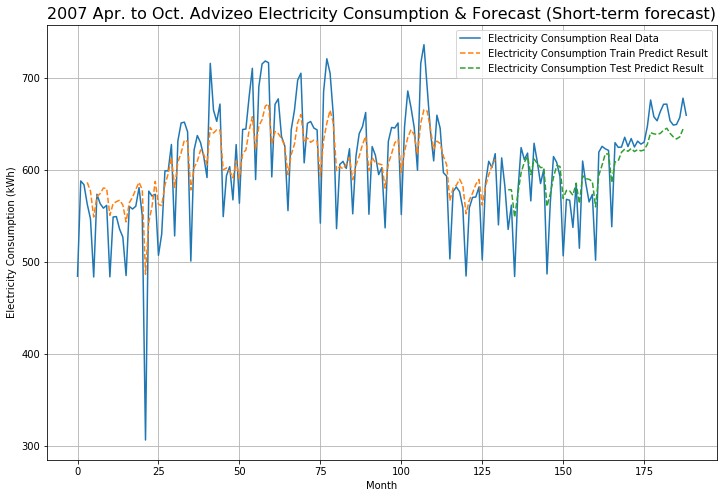

In [52]:
plt.figure(figsize=(12, 8))

trainPredictPlot = np.empty_like(all_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[0 + look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(all_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(2*look_back):len(all_data)-1, :] = test_predict

plt.plot(all_data,"-")
plt.plot(trainPredictPlot,"--")
plt.plot(testPredictPlot,"--")

plt.legend(['Electricity Consumption Real Data', 'Electricity Consumption Train Predict Result', 'Electricity Consumption Test Predict Result'])

plt.title('2007 Apr. to Oct. Advizeo Electricity Consumption & Forecast (Short-term forecast)', size=16)
plt.xlabel('Month')
plt.ylabel('Electricity Consumption (kWh)')  

plt.grid(True)
plt.show()

---

# -END-